In [1]:
#imports
#from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM


In [2]:
#Preparing data
company='ONGC.NS'
start =dt.datetime(2012,1,1)
end=dt.datetime(2020, 1, 1)
data=web.DataReader(company,'yahoo',start,end)

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_Days=60

x_train=[]
y_train=[]
for x in range(prediction_Days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_Days:x,0])
    y_train.append(scaled_data[x,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [3]:
#Creating model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)
 
test_start =dt.datetime(2020,1,1)
test_end=dt.datetime.now()

test_data=web.DataReader(company,'yahoo',test_start,test_end)

actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'],test_data['Close']))

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_Days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)
x_test=[]
for x in range(prediction_Days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_Days:x,0])
x_test=np.array(x_test)
x_test =np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)    


Epoch 1/25
60/60 [==============================] - 13s 81ms/step - loss: 0.0280
Epoch 2/25
60/60 [==============================] - 4s 74ms/step - loss: 0.0037
Epoch 3/25
60/60 [==============================] - 5s 76ms/step - loss: 0.0034
Epoch 4/25
60/60 [==============================] - 5s 77ms/step - loss: 0.0029
Epoch 5/25
60/60 [==============================] - 5s 77ms/step - loss: 0.0030
Epoch 6/25
60/60 [==============================] - 5s 79ms/step - loss: 0.0026
Epoch 7/25
60/60 [==============================] - 5s 79ms/step - loss: 0.0027
Epoch 8/25
60/60 [==============================] - 5s 79ms/step - loss: 0.0029
Epoch 9/25
60/60 [==============================] - 5s 79ms/step - loss: 0.0024
Epoch 10/25
60/60 [==============================] - 5s 79ms/step - loss: 0.0022
Epoch 11/25
60/60 [==============================] - 5s 78ms/step - loss: 0.0021
Epoch 12/25
60/60 [==============================] - 5s 81ms/step - loss: 0.0021
Epoch 13/25
60/60 [=================

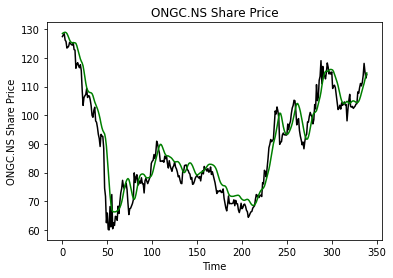

Prediction: [[115.273186]]


In [4]:
#Plots
plt.plot(actual_prices,color='black',label=f"Actual {company} Price")
plt.plot(predicted_prices,color='green',label=f"Predicted {company} Price")    
plt.title(f"{company} Share Price") 
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.show()
                  
real_data=[model_inputs[len(model_inputs)+1-prediction_Days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")